In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
import matplotlib.cm
import util
import json
from fit import get_weights
import itertools

In [3]:
print "test"

test


## Load meta data

In [5]:
#load registry and fit data
with open("registry.json") as f:
    registry_data = json.load(f)
with open("fits.json") as f:
    fit_data = json.load(f)
    
with open("multiple_sources.json") as f:
    seps_registry = json.load(f)

seps_main = [entry for entry in seps_registry if "main" in entry.get("tags", [])][0]

fit_data.sort(key=lambda fit: fit["m"])

In [43]:
#Read and filter data
mc_data = [util.read_from_indices("neutrinos", [index]) for index in range(seps_main["first_index"], seps_main["last_index"]+1)]

#Compute "base" (that is, excluding gacc) Rmax values in a mc_data-parallel array.
#(this approach is a little different than the one used in fit.jl, but should yield the same result
sources = np.load("sources.npy")
particle_Rmax_bases = []

for (source, dataset) in zip(sources, mc_data):
    particle_Rmax_bases.append(np.array([0.138 * (source["L"]/1e38)**(3/7.)]*dataset.shape[0]))

particle_Rmax_base = np.concatenate(particle_Rmax_bases)
mc_data = np.concatenate(mc_data)
particle_ids = util.read_particle_id(mc_data["ID"])

filter = np.logical_and (
                        mc_data["E"] > 1e-1,
                        ((abs(mc_data["ID"]) == 14) | (abs(mc_data["ID"]) == 16) | (abs(mc_data["ID"]) == 18)))

mc_data = mc_data.compress (filter)
particle_Rmax_base = particle_Rmax_base.compress(filter)
particle_ids = util.read_particle_id(mc_data["ID"]) #re-compute IDs to account for modified mc_data

Reading data:
        10 items read.
Reading data:
        12 items read.
Reading data:
         1 items read.
Reading data:
         0 items read.
Reading data:
         0 items read.
Reading data:
         9 items read.
Reading data:
        18 items read.
Reading data:
         4 items read.
Reading data:
        11 items read.
Reading data:
         0 items read.
Reading data:
         0 items read.
Reading data:
         0 items read.
Reading data:
         0 items read.
Reading data:
         1 items read.
Reading data:
        25 items read.
Reading data:
        14 items read.
Reading data:
        67 items read.
Reading data:
        61 items read.
Reading data:
        30 items read.
Reading data:
         8 items read.
Reading data:
         3 items read.
Reading data:
         0 items read.
Reading data:
        24 items read.
Reading data:
         0 items read.
Reading data:
         0 items read.
Reading data:
         2 items read.
Reading data:
        25 items read.
R

    219461 items read.
Reading data:
         0 items read.
Reading data:
        16 items read.
Reading data:
         9 items read.
Reading data:
      1150 items read.
Reading data:
         2 items read.
Reading data:
        15 items read.
Reading data:
        18 items read.
Reading data:
         0 items read.
Reading data:
         0 items read.
Reading data:
         0 items read.
Reading data:
         0 items read.
Reading data:
         0 items read.
Reading data:
       126 items read.
Reading data:
         8 items read.
Reading data:
         0 items read.
Reading data:
         0 items read.
Reading data:
        14 items read.
Reading data:
         0 items read.
Reading data:
        17 items read.
Reading data:
         0 items read.
Reading data:
         3 items read.
Reading data:
         5 items read.
Reading data:
        31 items read.
Reading data:
         8 items read.
Reading data:
         0 items read.
Reading data:
        28 items read.
Reading data:
 

In [45]:
filter = np.logical_and (
                        mc_data["E"] > 1e-1,
                        ((abs(mc_data["ID"]) == 14) | (abs(mc_data["ID"]) == 16) | (abs(mc_data["ID"]) == 18)))

In [53]:
neutrinos = mc_data

In [46]:
all(filter)

True

In [68]:
#find a fitting fit
for fit in fit_data:
    if fit["p"] == registry_data[seps_main["first_index"]]["p"] and fit["indices"] == [None] and fit.get("lnA_fit_weight") == 5. and "[seps]" in fit["fit_method"] and "[Si]" in fit["fit_method"]:
        paramsc = fit["params"]
        break
        
sampling_p = fit["p"]

## Neutrinos

### Load

In [14]:
params

{u'a': 3.36579694406548e-15,
 u'cost': 1374.0536811935808,
 u'gacc': 0.7412924544251559,
 u'lnA_cost': 14.983283306361297,
 u'p': 1.9548800393130097,
 u'spectrum_cost': 999.4715985345479,
 u'wCNO': 0.3789613341529192,
 u'wFe': 2.909708462045675,
 u'wHe': 14.600648065134678,
 u'wP': 75.84459117349964,
 u'wSi': 6.266090965167091}

In [52]:
get_weights_neutrinos(mc_data, sampling_p, params) == 0

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)


### Plot

In [78]:
bounds_E = np.array([5.011870e+06, 6.309570e+06, 7.943280e+06, 1.995260e+07, 5.011870e+07, 1.258930e+08, 3.162280e+08, 7.943280e+08, 1.995260e+09, 5.011870e+09, 1.258930e+10, 3.162280e+10, 7.943280e+10
][5:-2])
bounds_phi = np.array([1.135115e-08, 1.190701e-08, 1.260912e-08, 1.859683e-08, 2.134614e-08, 2.073100e-08, 1.783418e-08, 1.981252e-08, 3.069675e-08, 4.256704e-08, 7.334558e-08, 1.184359e-07, 2.651410e-07
][5:-2])

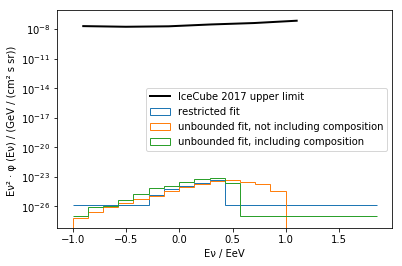

In [84]:
%matplotlib inline
plt.semilogy()

plt.hist(np.log10(neutrinos["E"]), bins=20, log=True, weights=(paramsa["a"] * get_weights_neutrinos(neutrinos, sampling_p, paramsa) * neutrinos["E"]**2 * 1e-7), histtype="step", label="restricted fit") #The 1e-7 is a scaling factor so we get a result in the right units
plt.hist(np.log10(neutrinos["E"]), bins=20, log=True, weights=(paramsb["a"] * get_weights_neutrinos(neutrinos, sampling_p, paramsb) * neutrinos["E"]**2 * 1e-7), histtype="step", label="unbounded fit, not including composition")
plt.hist(np.log10(neutrinos["E"]), bins=20, log=True, weights=(paramsc["a"] * get_weights_neutrinos(neutrinos, sampling_p, paramsc) * neutrinos["E"]**2 * 1e-7), histtype="step", label="unbounded fit, including composition")
plt.plot(np.log10(bounds_E/1e9), bounds_phi, color="k", label="IceCube 2017 upper limit", lw=2.)
plt.xlabel(u"Eν / EeV")
plt.ylabel(u"Eν² · φ (Eν) / (GeV / (cm² s sr)) ")
plt.legend()
plt.savefig("neutrinos.pdf")
plt.show()

## Nucleons

### Load

In [59]:
nucleons = util.read_from_indices("nucleons", indices)
nucleons = nucleons.compress(np.logical_and(nucleons["E"] > 1e-1, util.read_particle_id(nucleons["ID"])[0] == "nucleus"))
#nucleons = nucleons.compress(nucleons["D"] ==  3.58904)
name0, A0, Z0 = util.read_particle_id(nucleons["ID"])

Reading data:
    941294 items read.


### Plot

In [54]:
#Compute "base" (that is, excluding gacc) Rmax values in a mc_data-parallel array.
particle_Rmax_base = np.zeros(shape=nucleons.shape, dtype=np.float64)

for source in sources:
    particle_Rmax_base[np.isclose(nucleons["D"], source["D"])] = 0.138 * (source["L"]/1e38)**(3/7.)

/home/home1/friean6k/.local/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars


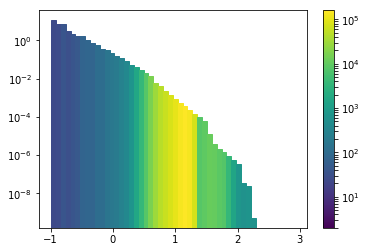

In [55]:
%matplotlib inline
#plt.semilogy()
util.augmented_hist(np.log10(nucleons["E"]), bins=50, log=True, weights=params["a"] * get_weights(nucleons, sampling_p, params))
#plt.hist2d(np.log10(nucleons["E0"]), np.log10(nucleons["E"]), norm=mpc.SymLogNorm(1), bins=120)
#plt.colorbar()


plt.show()

In [65]:
source_weights = []
weights = get_weights(nucleons, sampling_p, params)

for source in sources:
    source_weights.append(sum(weights[np.isclose(nucleons["D"], source["D"])]))
    

/home/home1/friean6k/.local/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


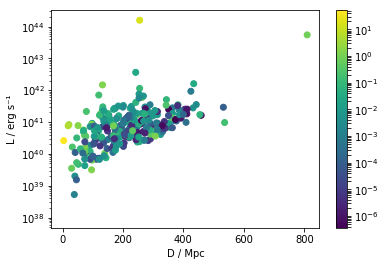

In [66]:
plt.scatter(sources["D"], sources["L"], c=np.array(source_weights), norm=mpc.LogNorm(), cmap="viridis")
plt.semilogy()
plt.xlabel("D / Mpc")
plt.ylabel(u"L / erg s⁻¹")
plt.colorbar()

In [74]:
np.log10(np.amax(nucleons["E"]))

2.9152409694166286

In [72]:
help(plt.colorbar)

Help on function colorbar in module matplotlib.pyplot:

colorbar(mappable=None, cax=None, ax=None, **kw)
    Add a colorbar to a plot.
    
    Function signatures for the :mod:`~matplotlib.pyplot` interface; all
    but the first are also method signatures for the
    :meth:`~matplotlib.figure.Figure.colorbar` method::
    
      colorbar(**kwargs)
      colorbar(mappable, **kwargs)
      colorbar(mappable, cax=cax, **kwargs)
      colorbar(mappable, ax=ax, **kwargs)
    
    arguments:
    
      *mappable*
        the :class:`~matplotlib.image.Image`,
        :class:`~matplotlib.contour.ContourSet`, etc. to
        which the colorbar applies; this argument is mandatory for the
        :meth:`~matplotlib.figure.Figure.colorbar` method but optional for the
        :func:`~matplotlib.pyplot.colorbar` function, which sets the
        default to the current image.
    
    keyword arguments:
    
      *cax*
        None | axes object into which the colorbar will be drawn
      *ax*
    

## Additional helper functions (run these first!)

In [27]:
def get_weights_nomix (mc_data, simulation_p, params):

    weights = mc_data["E0"]**(-simulation_p-params["p"]) #XXX: params["p"] is currently defined to be negative (ie implicitly multiplied by -1), while simulation_p isn't
    
    name0, A0, Z0 = util.read_particle_id(mc_data["ID0"])
    
    R = mc_data["E0"] / Z0 #NOTE: since E0 is in EeV, R is implicitly in units 1e18 as well
    #... which is handy, because particle_Rmax_base is in EV too, so we don't need to convert here.
    weights[R > params["gacc"] * particle_Rmax_base] = 0.


    return weights


def get_weights (mc_data, simulation_p, params):
    
    weights = get_weights_nomix(mc_data, simulation_p, params)
        
    iP, iHe, iCNO, iSi, iFe = get_element_indices(mc_data)
    
    weights[iP] *= params["wP"]/100.
    weights[iHe] *= params["wHe"]/100.
    weights[iCNO] *= params["wCNO"]/100.
    weights[iSi] *= params["wSi"]/100.
    weights[iFe] *= (100 - params["wP"] - params["wHe"] - params["wCNO"] - params["wSi"])/100.
    
    #weights[np.isnan(weights)] = 0.
    
    return weights

def get_element_indices (mc_data):
                
    name0, A0, Z0 = util.read_particle_id(mc_data["ID0"])
    is_nucleus = name0 == "nucleus"
    
    iP = (Z0==1) & is_nucleus
    iHe = (Z0==2) & is_nucleus
    iCNO = ((Z0==6) | (Z0==7) | (Z0==8)) & is_nucleus
    iSi = (Z0==14) & is_nucleus
    iFe = (Z0==26) & is_nucleus
    
    return iP, iHe, iCNO, iSi, iFe
    

def get_weights_neutrinos (neutrino_data, sampling_p, params):
    
    weights = get_weights_nomix(neutrino_data, sampling_p, params)
    viP, viHe, viCNO, viSi, viFe = get_element_indices(neutrino_data)
    
    weights[viP] *= params["wP"]/100.
    weights[viHe] *= params["wHe"]/100.
    weights[viCNO] *= params["wCNO"]/100.
    weights[viSi] *= params["wSi"]/100.
    weights[viFe] *= (100 - params["wP"] - params["wHe"] - params["wCNO"] - params["wSi"])/100.
    weights[np.isnan(weights)] = 0.
    
    return weights


def reweight (mc_data, **params):

    weights = get_weights(mc_data, sampling_p, params)
    np.save("/tmp/weights_test.npy", weights)
    hist = np.bincount(np.digitize(np.log10(mc_data["E"]), bins=bins), weights=weights, minlength=len(bins)) * params["a"]
    hist = hist[1:] #ignore first bin, for compatibility with np.histogram (technically, we'd have to ignore the last bin as well, but in this case, that extends to infinity anyways.
    #print params["p"], params["a"]

    return hist


def reweight_massdist (mc_data, **params):
    
    particle_ids = util.read_particle_id(mc_data["ID"])

    weights = get_weights(mc_data, sampling_p, params)
    binned = np.digitize(np.log10(mc_data["E"]), bins=lnA_bins)
    numbers = np.bincount(binned, weights=weights, minlength=len(lnA_bins))[1:]
    sums = np.bincount(binned, weights=weights*np.log(particle_ids[1]), minlength=len(lnA_bins))[1:]

    result = sums/numbers
    result[numbers == 0] = 0.

    return result

